# Data Preparation

## Load data from sqlite3 in json

In [1]:
from utils.db.get_data_db import get_data_json
## accuracy
from utils.information_retrieval import get_times_per_tt, get_confidence_per_tt, get_answers_scores_multiple_sel, get_answers_scores_single_sel

from adjustText import adjust_text
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

db_file_path = 'data/study_02.db'
data = get_data_json(db_file_path)

In [2]:
from matplotlib import pyplot as plt
from matplotlib.text import Annotation
import seaborn as sns
p_all = {'AG':'blue','IG':'magenta','SG':'#32CD32','all':'#FFC831'}
p_plain = {'AG':'blue','IG':'magenta','SG':'#32CD32'}
hue_order = ['all','AG','IG','SG']
hue_order_plain = ['AG','IG','SG']

def add_labels(ax, x,y,labels,colors = []):
    alpha = 0.6
    texts = []
    for i,pair in enumerate(zip(x,y)):
        # texts.append(ax.text(pair[0], pair[1], labels[i], fontsize = 12, color = colors[i], alpha = alpha))
        texts.append(ax.text(pair[0], pair[1], labels[i], fontsize = 12, color = 'black', alpha = alpha))
    adjust_text(texts, 
                ax=ax, 
                lim=2000, 
                text_from_points = True, 
                text_from_text = True, 
                autoalign = 'y',
                expand_text = (1.05, 1.2), 
                expand_points = (1.05, 1.2),
                expand_objects = (1.05, 1.2), 
                force_text = (0.1, 0.25), 
                force_points = (0.2, 0.5),
                force_objects  = (0.1, 0.25),
                precision  = 0.002,
                # precision  = 0.,
                arrowprops = dict(arrowstyle="-", color='gray', lw=0.5, alpha = alpha))
    annotations = [child for child in ax.get_children() if isinstance(child, Annotation)]
    for i, arrow in enumerate(annotations):
        arrow.arrow_patch.set(color = 'black')

## Data cleaning

Remove any incomplete registration created when participants by mistake clicked multiple times the "Registration" button.

In [3]:
data_processed = {}
for p in data:
    if data[p]['status'] == "end" or data[p]['status'] == "end_thanks":
        data_processed[p] = data[p]

In [29]:
## How did you find the design of the visualization for the simulated data? Was it informative, annoying, distractive?
word = ""
for p in data_processed:
    word = word + " " +data_processed[p]['ue_answers']['ue4']['text']
word

' The visualisations were informative and fairly easy to follow. It gave information in a simple, clear and organized way. A bit distractive but on the whole comprehensive Informative informative I found it useful; I like that it was animated and you could see how changing one variable "moves" the others   Informative Good Very Informative I found it distractive  Very good and easy to understand the changes.  Informative   the colours were a good contrast - the scatter graph i found easier to view Informative but complex  Informative Informative Informative, the visualization was actually very good annoying, lengthy  Quite informative informative Informative Could have been spaced out a little more. Informative but too descriptive at times\n Somewhat informative The design of visualization for simulated data was informative but repetitive after a point of time. Overall it gave good information. it was what it needed to be Clear enough'

## Get observed Response Times, Accuracy, and Confidence per Task Type (TT) and group (IG, SG, AG)

<!-- There are 3 research questions in the study. -->

TT1: Given an intervention, which is the correct causal model?

TT2: Given a set of causal models and intervention, which interventions are sufficient to identify the causal model? Which is the correct causal model? 

----------------------

IG: Interaction Group

SG: Static Group

AG: Animation Group

<!-- The study consisted of 3 problems. Each problem was modelled by a different probabilistic model. There were 3 sets of questions in each problem with every set corresponding to one of the research questions. -->

<!-- The task ids per problem and RQ are following:

**Problem 1: Temperature in Scotland**

RQ1: t1

RQ2: t2, t3, t4

RQ3: t5

**Problem 2: Random real-number generator**

RQ1: t6

RQ2: t7, t8, t9

RQ3: t10, t11

**Problem 3: Lorry drivers reaction times**

RQ1: t12, t13

RQ2: t14, t15, t16, t17

RQ3: t18, t19 -->

In [6]:
# task ids per TT
t_ids = {}
t_ids['T1'] = ['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10']
t_ids['T2'] = ['t11','t12','t13','t14','t15','t16']

## times
times_i, times_s, times_a = get_times_per_tt(data_processed, t_ids, db_file_path) # returns Dict <TT: Dict<t_id:List>>
## confidence
conf_i, conf_s, conf_a = get_confidence_per_tt(data_processed, t_ids, db_file_path) # returns Dict <TT: Dict<t_id:List>>

## TT1
## corr answ taken responses as multiple choice selections
answ_sc_i_multi, answ_sc_s_multi, answ_sc_a_multi = get_answers_scores_multiple_sel(data_processed, 
                                                                                                 t_ids['T1'], 
                                                                                                 db_file_path, 'T1') # returns Dict<t_id:List>
## corr answ taken responses as single selection
answ_sc_i_singl, answ_sc_s_singl, answ_sc_a_singl = get_answers_scores_single_sel(data_processed, 
                                                                                               t_ids['T1'], 
                                                                                               db_file_path) # returns Dict<t_id:List>
## TT2
answ_sc_i_model_T2, answ_sc_s_model_T2, answ_sc_a_model_T2 = get_answers_scores_single_sel(data_processed, 
                                                                                               t_ids['T2'], 
                                                                                               db_file_path) # returns Dict<t_id:List>
answ_sc_i_interv_T2, answ_sc_s_interv_T2, answ_sc_a_interv_T2 = get_answers_scores_multiple_sel(data_processed, 
                                                                                                 t_ids['T2'], 
                                                                                                 db_file_path, 'T2') # returns Dict<t_id:List>
## demographic questions answers
d_ids = ['d1','d2','d3','d4','d5']
answ_demo_i = {}
answ_demo_s = {}
answ_demo_a = {}
for d in d_ids:
    answ_demo_i[d] = [p_details['d_answers'][d]['option'] 
            for p,p_details in data_processed.items() 
            if p_details['mode'] == 'i' ]
    answ_demo_s[d] = [p_details['d_answers'][d]['option'] 
            for p,p_details in data_processed.items() 
            if p_details['mode'] == 's' ]
    answ_demo_a[d] = [p_details['d_answers'][d]['option'] 
            for p,p_details in data_processed.items() 
            if p_details['mode'] == 'a' ]
    
## user exp questions answers
ue_ids = ['ue1','ue2','ue3']
answ_ue_i = {}
answ_ue_s = {}
answ_ue_a = {}
for d in ue_ids:
    answ_ue_i[d] = [p_details['ue_answers'][d]['slider_value'] 
            for p,p_details in data_processed.items() 
            if p_details['mode'] == 'i' ]
    answ_ue_s[d] = [p_details['ue_answers'][d]['slider_value'] 
            for p,p_details in data_processed.items() 
            if p_details['mode'] == 's' ]
    answ_ue_a[d] = [p_details['ue_answers'][d]['slider_value'] 
            for p,p_details in data_processed.items() 
            if p_details['mode'] == 'a' ]

### Test Data Retrieval

In [12]:
from collections import Counter
times = {}
for p in data_processed:
    if data_processed[p]['mode'] == 'i':
        for t in data_processed[p]['t_answers']:
            if t not in times:
                times[t] = []
            times[t].append(data_processed[p]['t_answers'][t]['options'])
            # if len(data_processed[p]['t_answers'][t]['options'])>1 and t in t_ids['T2']:                
                # print([(t,p,k) for (k,v) in Counter(data_processed[p]['t_answers'][t]['options']).items() if v > 1])
                # print(t,p,data_processed[p]['t_answers'][t]['options'])
            times[t].append(data_processed[p]['t_answers'][t]['model_opt'])
            #print(t,data_processed[p]['t_answers'][t]['response_time'])
## times['t10'] vs answ_sc_i_multi['t10']
times['t11']

[['Atomic intervention on tiredness'],
 'Causal Model 3',
 ['Atomic intervention on insomnia',
  'Atomic intervention on anxiety',
  'Atomic intervention on tiredness'],
 'Causal Model 2',
 ['Atomic intervention on insomnia'],
 'Causal Model 2',
 ['Atomic intervention on anxiety'],
 'Causal Model 2',
 ['Atomic intervention on tiredness'],
 'Causal Model 2',
 ['Atomic intervention on tiredness'],
 'Causal Model 3',
 ['Atomic intervention on insomnia'],
 'Causal Model 1',
 ['Atomic intervention on tiredness'],
 'Causal Model 3',
 ['Atomic intervention on tiredness'],
 'Causal Model 2',
 ['Atomic intervention on insomnia'],
 'Causal Model 2',
 ['Atomic intervention on insomnia', 'Atomic intervention on anxiety'],
 'Causal Model 2']

In [13]:
answ_sc_i_interv_T2['t11']

[1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 2]

### Data Preparation for Plotting

In [9]:
def add_to_data_T1(data, task_types, answers,answers_multi, answ_demo, times,confidence,mode,participants):
    for t in answers:
        ## 'IG', 'AG', or 'SG'
        data['accuracy'].extend(answers[t])
        data['accuracy_ham'].extend(answers_multi[t])
        data['time'].extend(times[t])
        data['conf'].extend(confidence[t])
        data['condition'].extend([mode]*len(answers[t]))
        data['task'].extend([t]*len(answers[t]))
        data['participant'].extend(participants)
        data['intervention'].extend([task_types[t]]*len(answers[t]))
        data['d1'].extend(answ_demo['d1'])
        data['d2'].extend(answ_demo['d2'])
        data['d3'].extend(answ_demo['d3'])
        data['d4'].extend(answ_demo['d4'])
        data['d5'].extend(answ_demo['d5'])
        ## 'all'
        data['accuracy'].extend(answers[t])
        data['accuracy_ham'].extend(answers_multi[t])
        data['time'].extend(times[t])
        data['conf'].extend(confidence[t])
        data['condition'].extend(['all']*len(answers[t]))
        data['task'].extend([t]*len(answers[t]))
        data['participant'].extend(participants)
        data['intervention'].extend([task_types[t]]*len(answers[t]))
        data['d1'].extend(answ_demo['d1'])
        data['d2'].extend(answ_demo['d2'])
        data['d3'].extend(answ_demo['d3'])
        data['d4'].extend(answ_demo['d4'])
        data['d5'].extend(answ_demo['d5'])
        
def add_to_data_T2_model(data, task_types, answers, answ_demo, times,confidence,mode,participants):
    for t in answers:
        ## 'IG', 'AG', or 'SG'
        data['accuracy'].extend(answers[t])
        data['time'].extend(times[t])
        data['conf'].extend(confidence[t])
        data['condition'].extend([mode]*len(answers[t]))
        data['task'].extend([t]*len(answers[t]))
        data['participant'].extend(participants)
        data['intervention'].extend([task_types[t]]*len(answers[t]))
        data['d1'].extend(answ_demo['d1'])
        data['d2'].extend(answ_demo['d2'])
        data['d3'].extend(answ_demo['d3'])
        data['d4'].extend(answ_demo['d4'])
        data['d5'].extend(answ_demo['d5'])
        ## 'all'
        data['accuracy'].extend(answers[t])
        data['time'].extend(times[t])
        data['conf'].extend(confidence[t])
        data['condition'].extend(['all']*len(answers[t]))
        data['task'].extend([t]*len(answers[t]))
        data['participant'].extend(participants)
        data['intervention'].extend([task_types[t]]*len(answers[t]))
        data['d1'].extend(answ_demo['d1'])
        data['d2'].extend(answ_demo['d2'])
        data['d3'].extend(answ_demo['d3'])
        data['d4'].extend(answ_demo['d4'])
        data['d5'].extend(answ_demo['d5'])
        
task_types = {'t1':'atomic',
              't2':'atomic',
              't3':'atomic',
              't4':'atomic',
              't5':'atomic',
              't6':'shift',
              't7':'shift',
              't8':'variance',
              't9':'variance',
              't10':'variance',
              't11':'atomic','t12':'atomic','t13':'shift','t14':'shift','t15':'variance','t16':'variance'}

participants_i = [p for p,p_details in data_processed.items() 
                      if p_details['mode'] == 'i' ]
participants_s = [p for p,p_details in data_processed.items() 
                      if p_details['mode'] == 's']
participants_a = [p for p,p_details in data_processed.items() 
                      if p_details['mode'] == 'a']

#### T1

In [10]:
## T1
data = {'accuracy': [], 'accuracy_ham':[],'time': [], 'conf': [], 'condition': [], 'task':[], 'participant':[], 'intervention':[], 'd1':[],'d2':[],'d3':[],'d4':[],'d5':[]}

## INTERACTION
answers = answ_sc_i_singl
answers_multi = answ_sc_i_multi
answ_demo = answ_demo_i
times = times_i['T1']
confidence = conf_i['T1']
mode = 'IG'
participants = participants_i
add_to_data_T1(data, task_types, answers,answers_multi,answ_demo, times,confidence,mode,participants)

## ANIMATION
answers = answ_sc_a_singl
answers_multi = answ_sc_a_multi
answ_demo = answ_demo_a
times = times_a['T1']
confidence = conf_a['T1']
mode = 'AG'
participants = participants_a
add_to_data_T1(data, task_types, answers,answers_multi,answ_demo,times,confidence,mode,participants)

## STATIC
answers = answ_sc_s_singl
answers_multi = answ_sc_s_multi
answ_demo = answ_demo_s
times = times_s['T1']
confidence = conf_s['T1']
mode = 'SG'
participants = participants_s
add_to_data_T1(data, task_types, answers,answers_multi,answ_demo,times,confidence,mode,participants)

df = pd.DataFrame.from_dict(data)

In [12]:
data_perf_per_part = {'participant_id':[], 'num_tasks_correct':[], 'condition':[], 'd1':[],'d2':[],'d3':[],'d4':[],'d5':[],'ue1':[],'ue2':[],'ue3':[]}
df_tmp = df[df['condition']!='all']
for p in df['participant'].unique():
    ## per condition
    data_perf_per_part['num_tasks_correct'].append(df_tmp[df_tmp['participant'] == p]['accuracy'].sum())
    data_perf_per_part['participant_id'].append(str(p))
    data_perf_per_part['d1'].append(data_processed[p]['d_answers']['d1']['option']) 
    data_perf_per_part['d2'].append(data_processed[p]['d_answers']['d2']['option']) 
    data_perf_per_part['d3'].append(data_processed[p]['d_answers']['d3']['option']) 
    data_perf_per_part['d4'].append(data_processed[p]['d_answers']['d4']['option']) 
    data_perf_per_part['d5'].append(data_processed[p]['d_answers']['d5']['option']) 
    data_perf_per_part['ue1'].append(data_processed[p]['ue_answers']['ue1']['slider_value']) 
    data_perf_per_part['ue2'].append(data_processed[p]['ue_answers']['ue2']['slider_value']) 
    data_perf_per_part['ue3'].append(data_processed[p]['ue_answers']['ue3']['slider_value']) 
    if p in participants_i:
        data_perf_per_part['condition'].append('IG')
    elif p in participants_a:
        data_perf_per_part['condition'].append('AG')
    elif p in participants_s:
        data_perf_per_part['condition'].append('SG')
    ## all
    data_perf_per_part['num_tasks_correct'].append(df_tmp[df_tmp['participant'] == p]['accuracy'].sum())
    data_perf_per_part['participant_id'].append(str(p))
    data_perf_per_part['condition'].append('all')
    data_perf_per_part['d1'].append(data_processed[p]['d_answers']['d1']['option']) 
    data_perf_per_part['d2'].append(data_processed[p]['d_answers']['d2']['option']) 
    data_perf_per_part['d3'].append(data_processed[p]['d_answers']['d3']['option']) 
    data_perf_per_part['d4'].append(data_processed[p]['d_answers']['d4']['option']) 
    data_perf_per_part['d5'].append(data_processed[p]['d_answers']['d5']['option']) 
    data_perf_per_part['ue1'].append(data_processed[p]['ue_answers']['ue1']['slider_value']) 
    data_perf_per_part['ue2'].append(data_processed[p]['ue_answers']['ue2']['slider_value']) 
    data_perf_per_part['ue3'].append(data_processed[p]['ue_answers']['ue3']['slider_value']) 
df_perf_part = pd.DataFrame.from_dict(data_perf_per_part)

#### T2

In [92]:
## T2 - MODELs
data = {'accuracy': [], 'time': [], 'conf': [], 'condition': [], 'task':[], 'participant':[], 'intervention':[], 'd1':[],'d2':[],'d3':[],'d4':[],'d5':[]}

## INTERACTION
answers = answ_sc_i_model_T2
answ_demo = answ_demo_i
times = times_i['T2']
confidence = conf_i['T2']
mode = 'IG'
participants = participants_i
add_to_data_T2_model(data, task_types, answers,answ_demo,times,confidence,mode,participants)

## ANIMATION
answers = answ_sc_a_model_T2
answ_demo = answ_demo_a
times = times_a['T2']
confidence = conf_a['T2']
mode = 'AG'
participants = participants_a
add_to_data_T2_model(data, task_types, answers,answ_demo,times,confidence,mode,participants)

## STATIC
answers = answ_sc_s_model_T2
answ_demo = answ_demo_s
times = times_s['T2']
confidence = conf_s['T2']
mode = 'SG'
participants = participants_s
add_to_data_T2_model(data, task_types, answers,answ_demo,times,confidence,mode,participants)

df_T2_model = pd.DataFrame.from_dict(data)

<AxesSubplot: xlabel='participant_id', ylabel='num_tasks_correct'>

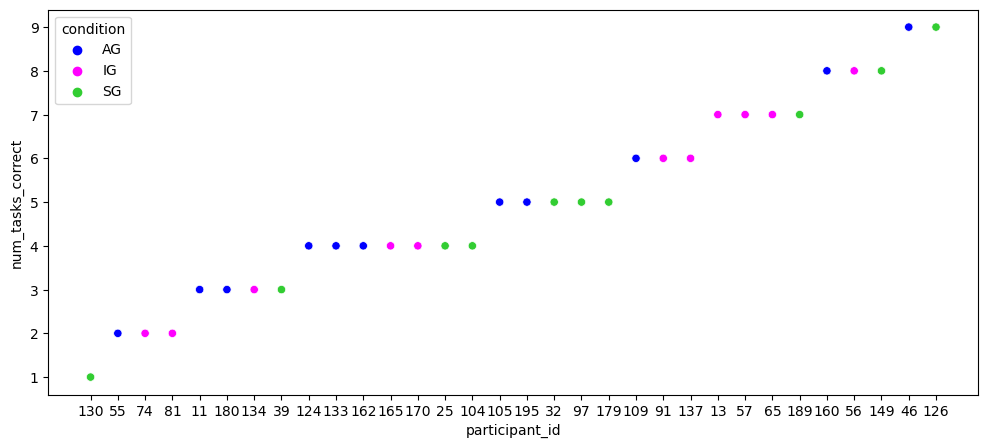

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

sns.scatterplot(df_perf_part[df_perf_part['condition']!='all'].sort_values(['num_tasks_correct','condition']), x='participant_id', y='num_tasks_correct', hue = 'condition', ax = ax, palette = p_plain, hue_order = hue_order_plain)

<AxesSubplot: xlabel='num_tasks_correct', ylabel='Proportion'>

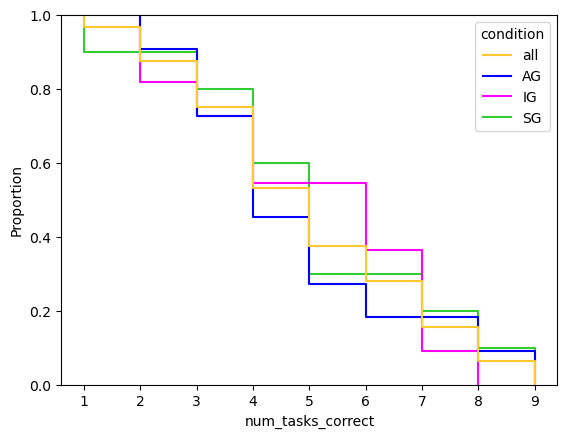

In [95]:
sns.ecdfplot(df_perf_part.sort_values(['num_tasks_correct','condition']), x='num_tasks_correct',  hue = 'condition', complementary=True, palette = p_all, hue_order=hue_order)

<AxesSubplot: xlabel='num_tasks_correct', ylabel='condition'>

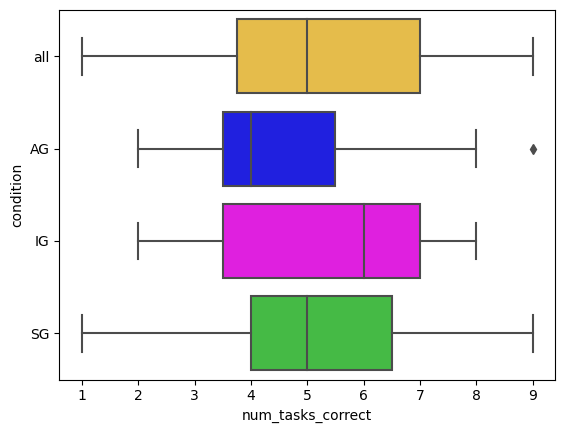

In [96]:
sns.boxplot(data=df_perf_part, x="num_tasks_correct", y="condition", palette = p_all, hue_order=hue_order, order = hue_order)

<AxesSubplot: xlabel='conf', ylabel='condition'>

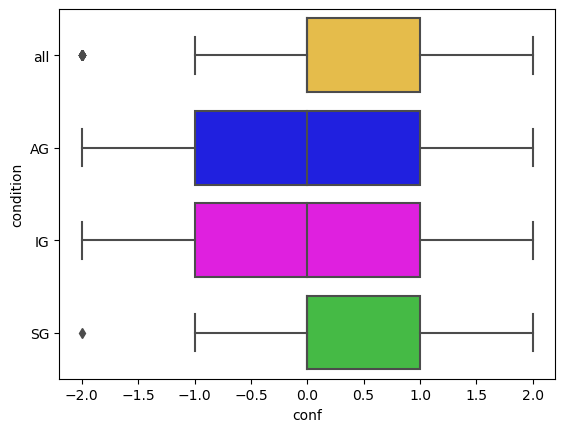

In [26]:
sns.boxplot(data=df, x="conf", y="condition", palette = p_all, hue_order=hue_order, order = hue_order)

<AxesSubplot: xlabel='time', ylabel='condition'>

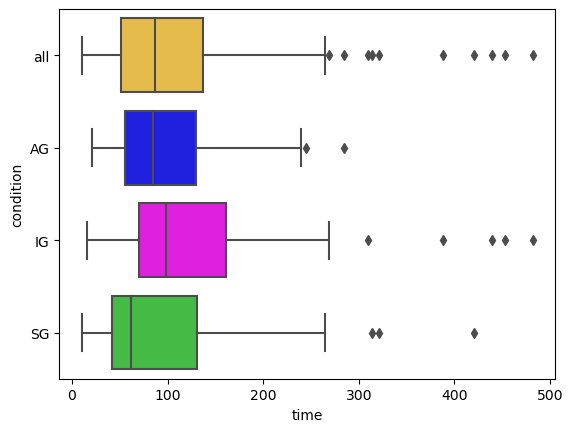

In [27]:
sns.boxplot(data=df, x="time", y="condition", palette = p_all, hue_order=hue_order, order = hue_order)

### Performance - Demographics

<AxesSubplot: xlabel='num_tasks_correct', ylabel='d3'>

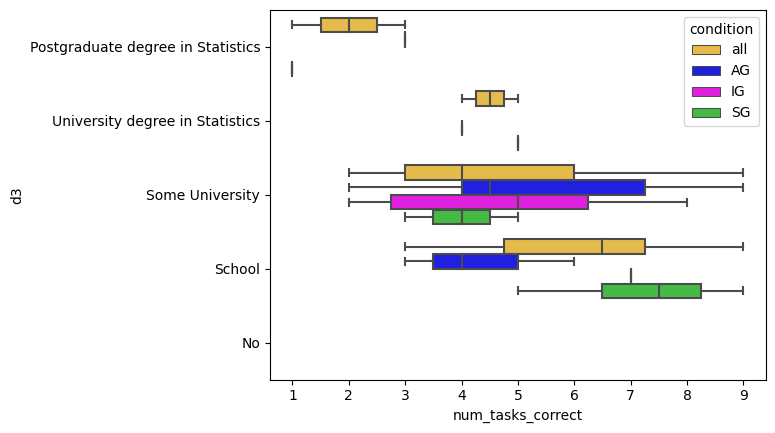

In [129]:
sns.boxplot(data=df_perf_part, x="num_tasks_correct", y="d3", hue = 'condition', palette = p_all, hue_order=hue_order, order = ['Postgraduate degree in Statistics', 'University degree in Statistics', 'Some University', 'School','No'])

<AxesSubplot: xlabel='num_tasks_correct', ylabel='d4'>

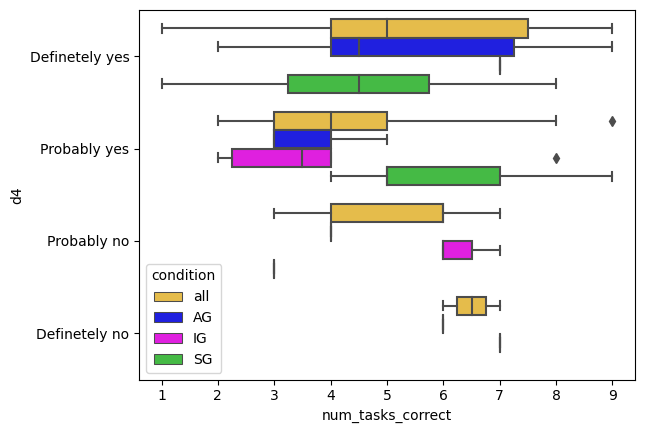

In [128]:
sns.boxplot(data=df_perf_part, x="num_tasks_correct", y="d4", hue = 'condition', palette = p_all, hue_order=hue_order, order = ['Definetely yes', 'Probably yes', 'Probably no', 'Definetely no'])

### User Experience

<AxesSubplot: xlabel='ue1', ylabel='num_tasks_correct'>

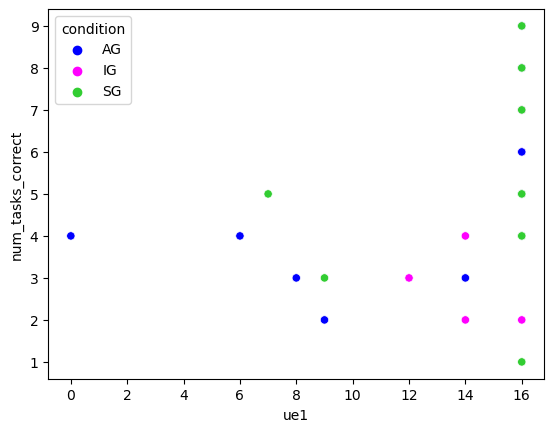

In [19]:
#In how many tasks in the study do you estimate that you looked at the directed graphs (DAGs) of the causal models?
sns.scatterplot(df_perf_part[df_perf_part['condition']!='all'], y='num_tasks_correct', x='ue1',hue='condition', palette = p_plain, hue_order=hue_order_plain)

<AxesSubplot: xlabel='ue1', ylabel='condition'>

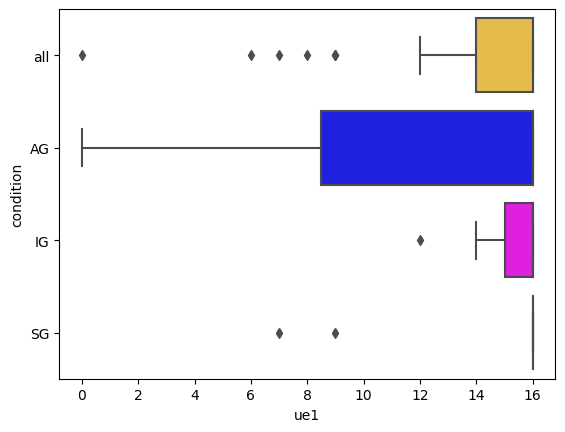

In [28]:
sns.boxplot(df_perf_part, y='condition', x='ue1', palette = p_all, order = hue_order)

<AxesSubplot: xlabel='ue2', ylabel='num_tasks_correct'>

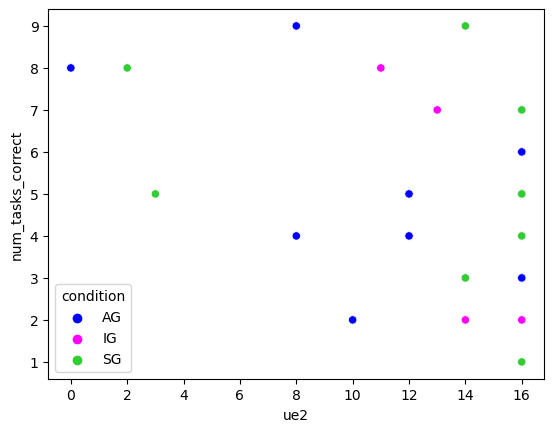

In [18]:
# In how many tasks in the study do you estimate that you looked at the scatter plots (plots presenting data with dot markers) in the scatter plot matrix?
sns.scatterplot(df_perf_part[df_perf_part['condition']!='all'], y='num_tasks_correct', x='ue2',hue='condition', palette = p_plain, hue_order=hue_order_plain)

<AxesSubplot: xlabel='ue2', ylabel='condition'>

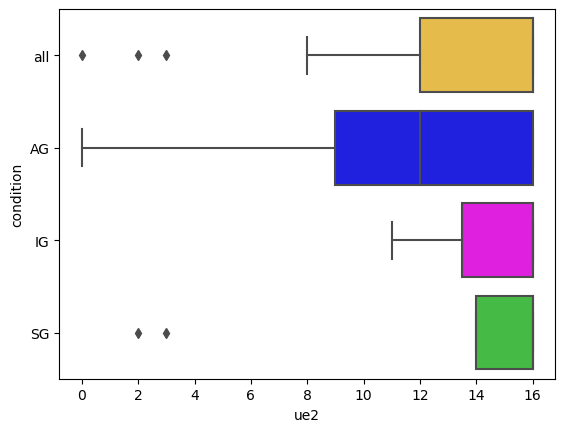

In [26]:
sns.boxplot(df_perf_part, y='condition', x='ue2', palette = p_all, order = hue_order)

<AxesSubplot: xlabel='ue3', ylabel='num_tasks_correct'>

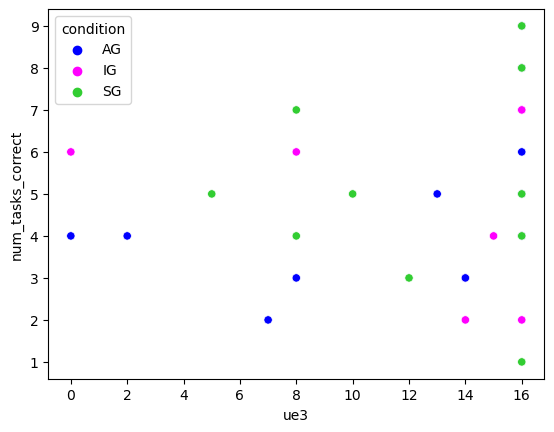

In [17]:
# In how many tasks in the study do you estimate that you looked at the KDE plots (plots presenting the variables\' distribution) on the diagonal of the scatter plot matrix?
sns.scatterplot(df_perf_part[df_perf_part['condition']!='all'], y='num_tasks_correct', x='ue3',hue='condition', palette = p_plain, hue_order=hue_order_plain)

<AxesSubplot: xlabel='ue3', ylabel='condition'>

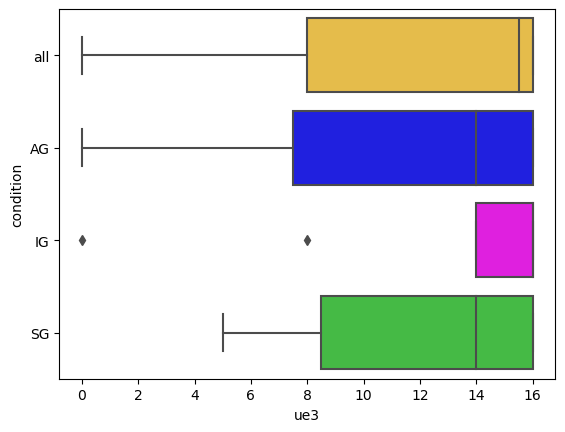

In [27]:
sns.boxplot(df_perf_part, y='condition', x='ue3', palette = p_all, order = hue_order)

### Plot accuracy per task and condition

<AxesSubplot: title={'center': 'condition = SG'}, xlabel='task', ylabel='Count'>

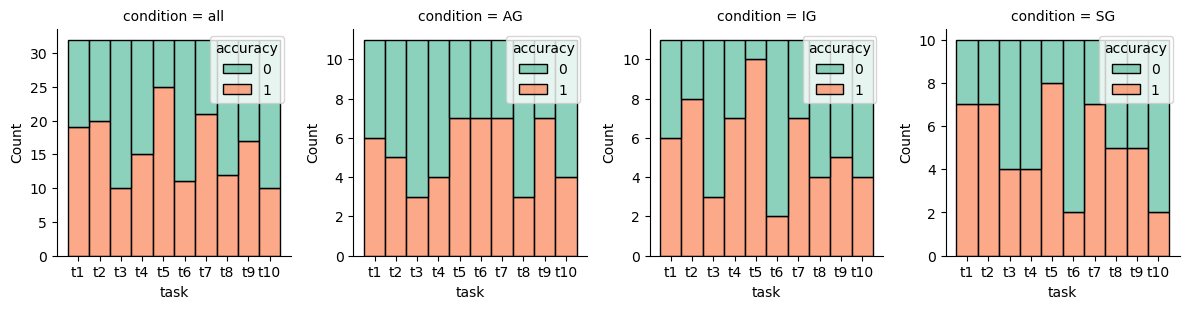

In [98]:
g = sns.FacetGrid(df, col="condition", col_order = hue_order, sharey=False)
sns.histplot(df[df['condition']=='all'], x="task", hue='accuracy', multiple="stack", ax = g.fig.axes[0], palette = sns.color_palette("Set2"))
sns.histplot(df[df['condition']=='AG'], x="task", hue='accuracy', multiple="stack", ax = g.fig.axes[1], palette = sns.color_palette("Set2"))
sns.histplot(df[df['condition']=='IG'], x="task", hue='accuracy', multiple="stack", ax = g.fig.axes[2], palette = sns.color_palette("Set2"))
sns.histplot(df[df['condition']=='SG'], x="task", hue='accuracy', multiple="stack", ax = g.fig.axes[3], palette = sns.color_palette("Set2"))

<AxesSubplot: title={'center': 'condition = SG'}, xlabel='task', ylabel='Count'>

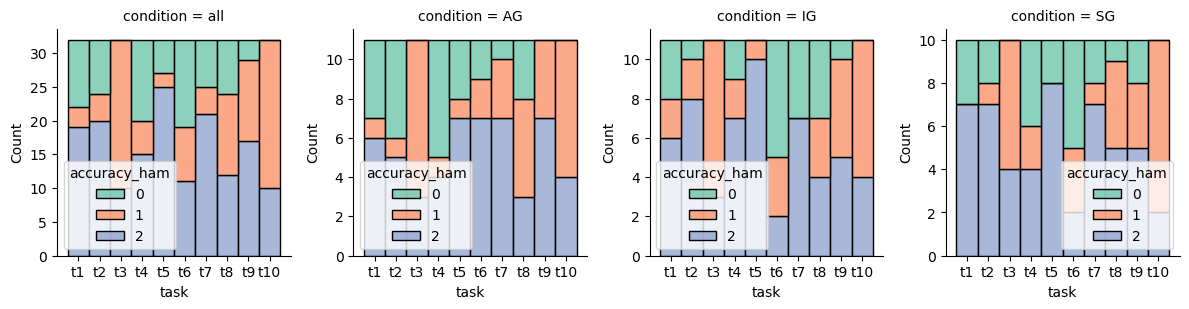

In [51]:
g = sns.FacetGrid(df, col="condition", col_order = hue_order, sharey=False)
sns.histplot(df[df['condition']=='all'], x="task", hue='accuracy_ham', multiple="stack", ax = g.fig.axes[0], palette = sns.color_palette("Set2"))
sns.histplot(df[df['condition']=='AG'], x="task", hue='accuracy_ham', multiple="stack", ax = g.fig.axes[1], palette = sns.color_palette("Set2"))
sns.histplot(df[df['condition']=='IG'], x="task", hue='accuracy_ham', multiple="stack", ax = g.fig.axes[2], palette = sns.color_palette("Set2"))
sns.histplot(df[df['condition']=='SG'], x="task", hue='accuracy_ham', multiple="stack", ax = g.fig.axes[3], palette = sns.color_palette("Set2"))

<AxesSubplot: title={'center': 'condition = SG'}, xlabel='task', ylabel='Count'>

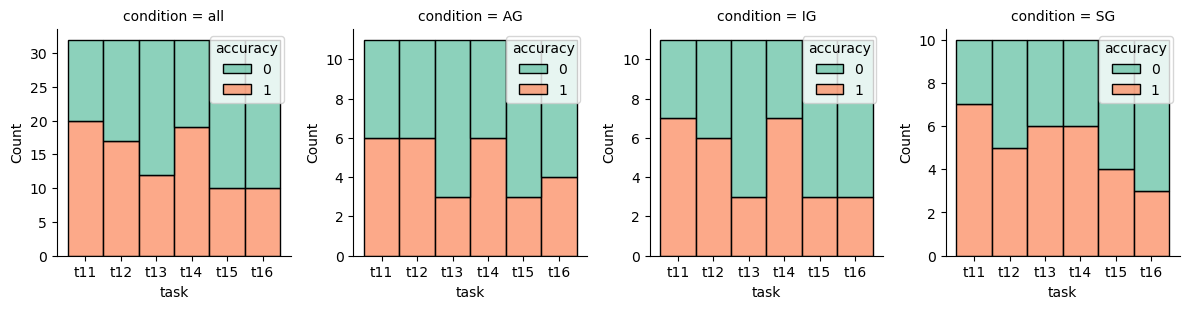

In [58]:
g = sns.FacetGrid(df, col="condition", col_order = hue_order, sharey=False)
sns.histplot(df_T2_model[df_T2_model['condition']=='all'], x="task", hue='accuracy', multiple="stack", ax = g.fig.axes[0], palette = sns.color_palette("Set2"))
sns.histplot(df_T2_model[df_T2_model['condition']=='AG'], x="task", hue='accuracy', multiple="stack", ax = g.fig.axes[1], palette = sns.color_palette("Set2"))
sns.histplot(df_T2_model[df_T2_model['condition']=='IG'], x="task", hue='accuracy', multiple="stack", ax = g.fig.axes[2], palette = sns.color_palette("Set2"))
sns.histplot(df_T2_model[df_T2_model['condition']=='SG'], x="task", hue='accuracy', multiple="stack", ax = g.fig.axes[3], palette = sns.color_palette("Set2"))

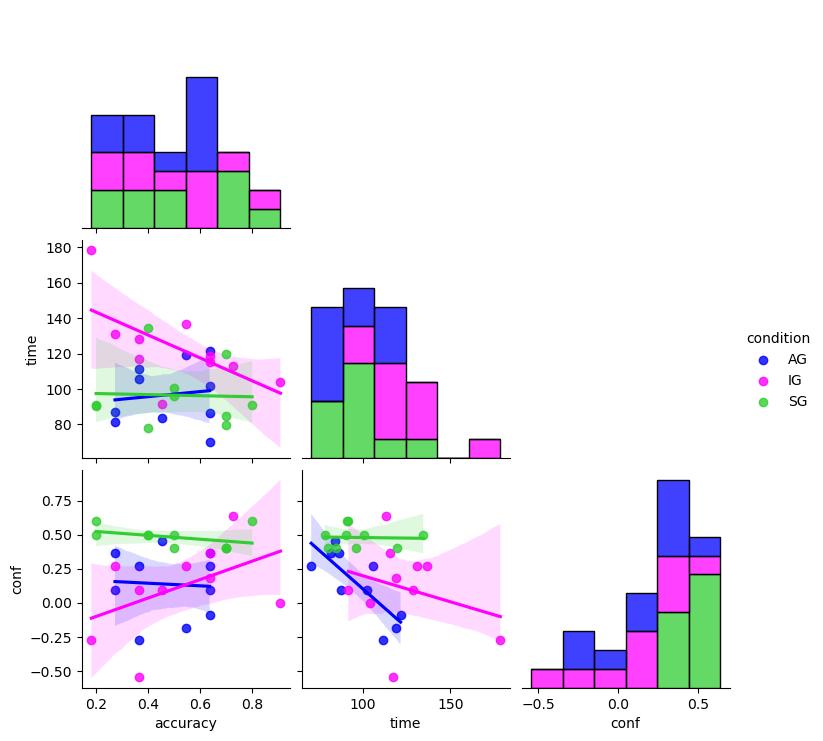

In [99]:
# p = {'atomic':'blue','shift':'magenta','variance':'#32CD32'}
# hue_order = ['atomic','shift','variance']
df_scatter = df[df['condition']!='all'].groupby(['task', 'condition'], as_index=False)['accuracy','time','conf'].mean()
g = sns.pairplot(df_scatter, palette = p_plain, hue_order=hue_order_plain, corner=True, diag_kind='hist', kind = 'reg', hue = 'condition', vars=['accuracy','time','conf'], diag_kws={'multiple':'stack'})
# add_labels(g.fig.axes[1], df_scatter['accuracy'],df_scatter['time'],df_scatter['task'])
# add_labels(g.fig.axes[4], pp_data['response_time'],pp_data['confidence'],pp_data['task'],pp_data['color'])
# add_labels(g.fig.axes[3], pp_data['accuracy'],pp_data['confidence'],pp_data['task'],pp_data['color'])

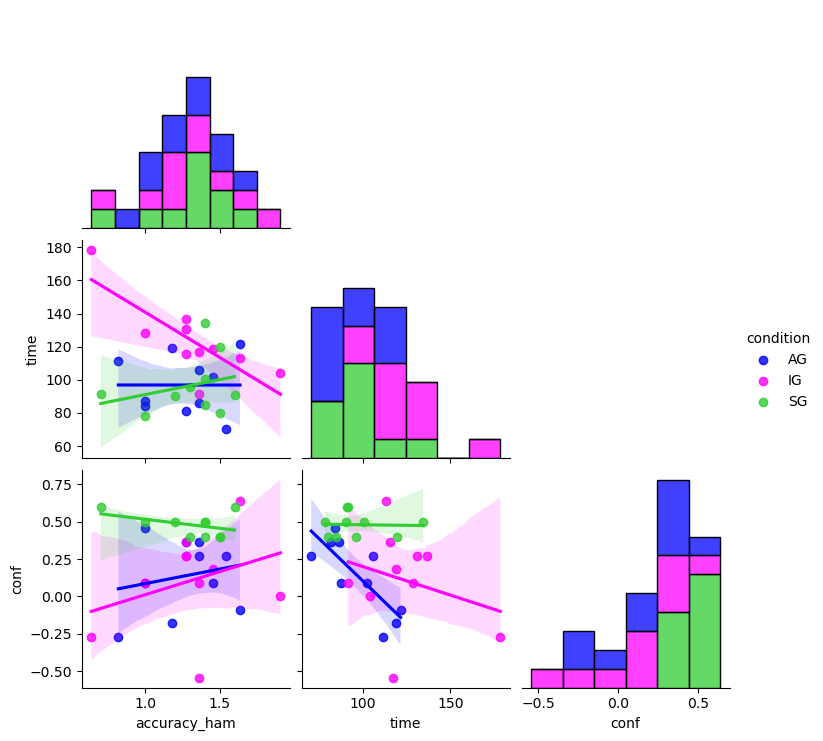

In [71]:
df_scatter = df[df['condition']!='all'].groupby(['task', 'condition'], as_index=False)['accuracy_ham','time','conf'].mean()
g = sns.pairplot(df_scatter, palette = p_plain, hue_order=hue_order_plain, corner=True, diag_kind='hist', kind = 'reg', hue = 'condition', vars=['accuracy_ham','time','conf'], diag_kws={'multiple':'stack'})

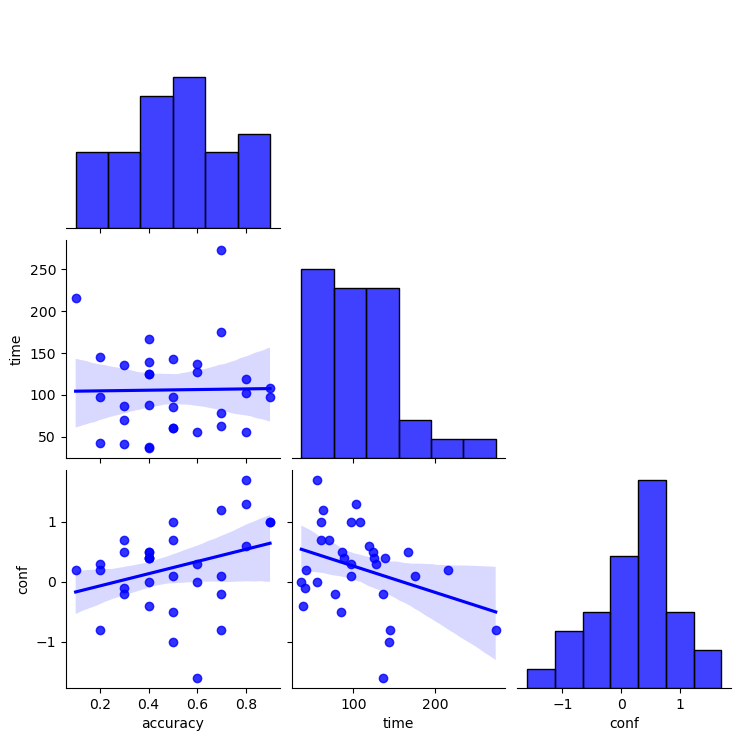

In [69]:
sns.pairplot(df.groupby(['participant'], as_index=False)['accuracy','time','conf'].mean(), vars=['accuracy','time','conf'],corner=True, diag_kind='hist',kind = 'reg',plot_kws={'color':'blue'},diag_kws={'color':'blue'})

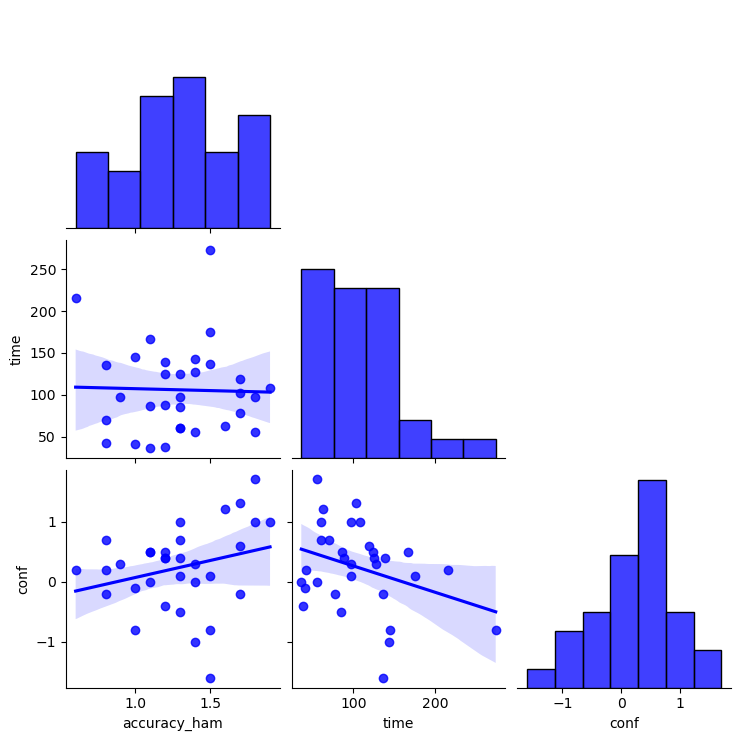

In [70]:
sns.pairplot(df.groupby(['participant'], as_index=False)['accuracy_ham','time','conf'].mean(), vars=['accuracy_ham','time','conf'],corner=True, diag_kind='hist',kind = 'reg',plot_kws={'color':'blue'},diag_kws={'color':'blue'})

### Intervention Type

<AxesSubplot: xlabel='accuracy', ylabel='Probability'>

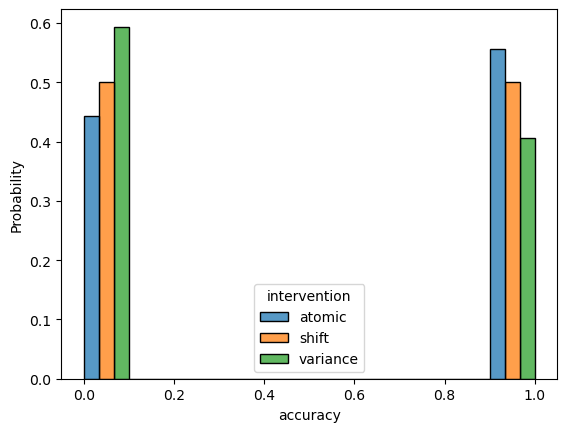

In [125]:
sns.histplot(df[df['condition']!='all'], x="accuracy", hue='intervention',stat='probability',common_norm = False,multiple="dodge")

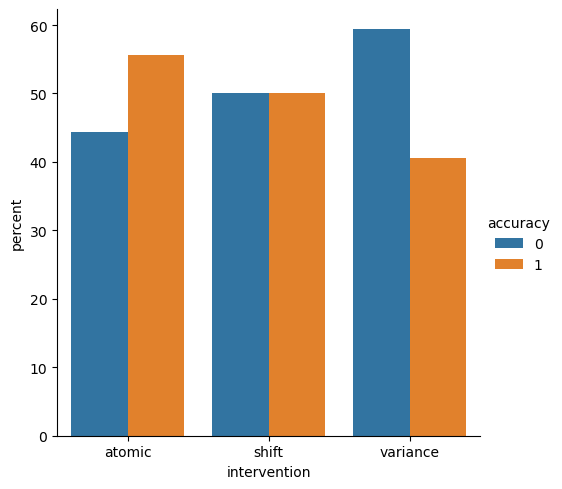

In [120]:
df_hist = df[df['condition']!='all'].groupby('intervention')['accuracy'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='intervention',y='percent',hue='accuracy',kind='bar')
# df_hist
# sns.histplot(df_hist, x="intervention", hue='accuracy',y='percent', multiple="stack")

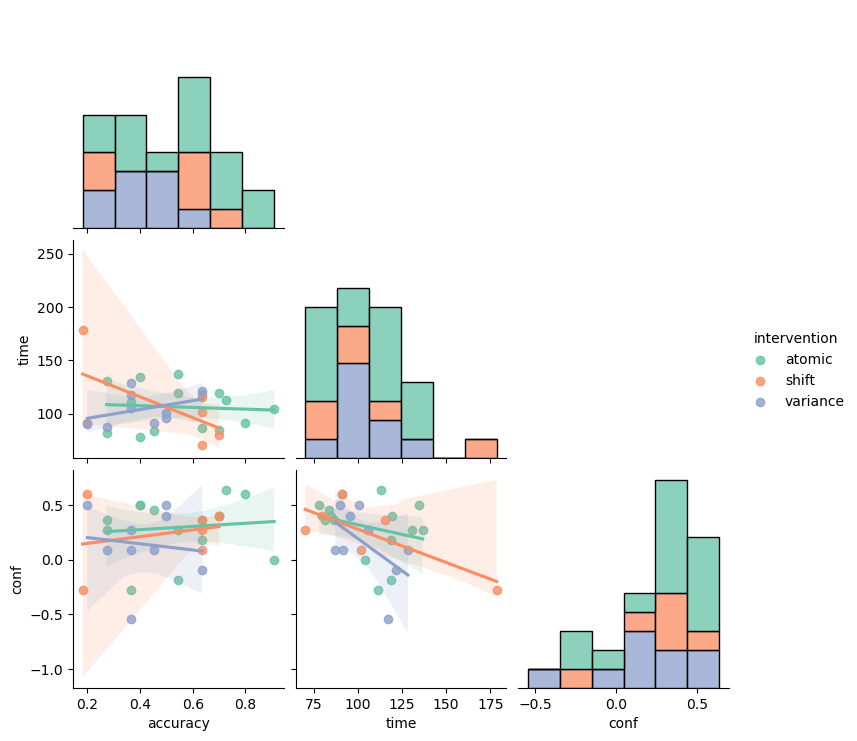

In [72]:
hue_order_interv = ['atomic','shift','variance']
df_scatter = df[df['condition']!='all'].groupby(['task', 'condition','intervention'], as_index=False)['accuracy','time','conf'].mean()
g = sns.pairplot(df_scatter, palette = sns.color_palette("Set2"), hue_order=hue_order_interv, corner=True, diag_kind='hist', kind = 'reg', hue = 'intervention', vars=['accuracy','time','conf'], diag_kws={'multiple':'stack'})
# add_labels(g.fig.axes[1], df_scatter['accuracy'],df_scatter['time'],df_scatter['task'])
# add_labels(g.fig.axes[4], pp_data['response_time'],pp_data['confidence'],pp_data['task'],pp_data['color'])
# add_labels(g.fig.axes[3], pp_data['accuracy'],pp_data['confidence'],pp_data['task'],pp_data['color'])

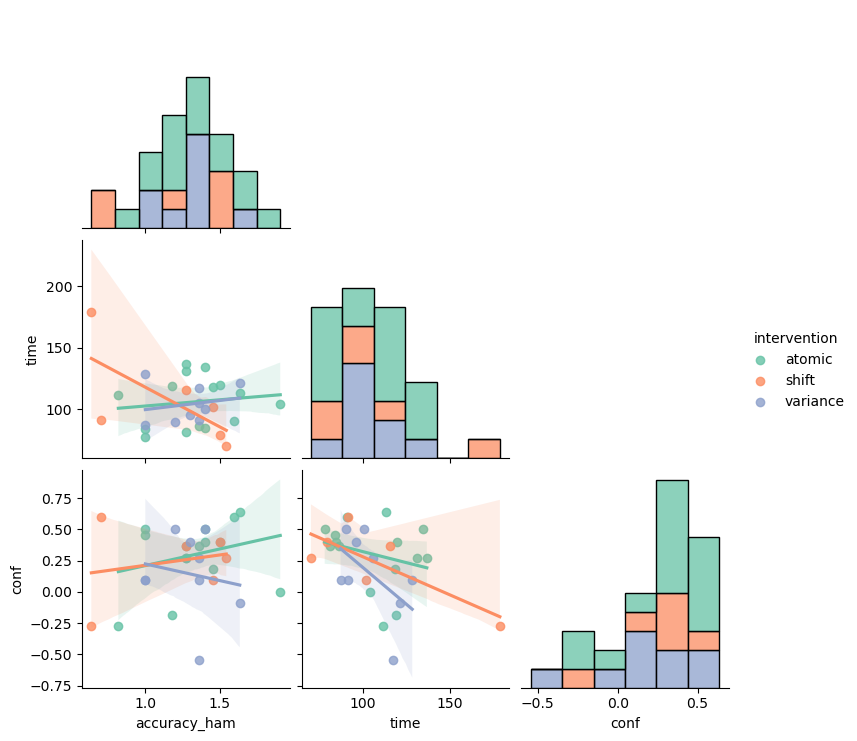

In [73]:
hue_order_interv = ['atomic','shift','variance']
df_scatter = df[df['condition']!='all'].groupby(['task', 'condition','intervention'], as_index=False)['accuracy_ham','time','conf'].mean()
g = sns.pairplot(df_scatter, palette = sns.color_palette("Set2"), hue_order=hue_order_interv, corner=True, diag_kind='hist', kind = 'reg', hue = 'intervention', vars=['accuracy_ham','time','conf'], diag_kws={'multiple':'stack'})